<a href="https://colab.research.google.com/github/satyajitghana/TSAI-DeepNLP-END2.0/blob/main/01_VeryBasics/END2_0_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
! pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=d59f3da41641ec4e2c9947a9f3032073161c00e7301af7858972e0da0881767b
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from torchviz import make_dot

%matplotlib inline
torch.manual_seed(2)

In [72]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1, 1)

In [73]:
class XOR(nn.Module):
    def __init__(self, input_dim=2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 4, bias=False)
        self.lin2 = nn.Linear(4, 4, bias=False)
        self.lin3 = nn.Linear(4, 4, bias=False)
        self.lin4 = nn.Linear(4, output_dim, bias=False)
    
    def forward(self, x):
        x = self.lin1(x)
        x = torch.tanh(x)
        x = self.lin2(x)
        x = torch.tanh(x)
        x = self.lin3(x)
        x = torch.tanh(x)
        x = self.lin4(x)
        return x

In [74]:
model = XOR()
print(model)
from torchsummary import summary
summary(model, (2, 2))

XOR(
  (lin1): Linear(in_features=2, out_features=4, bias=False)
  (lin2): Linear(in_features=4, out_features=4, bias=False)
  (lin3): Linear(in_features=4, out_features=4, bias=False)
  (lin4): Linear(in_features=4, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 4]               8
            Linear-2                 [-1, 2, 4]              16
            Linear-3                 [-1, 2, 4]              16
            Linear-4                 [-1, 2, 1]               4
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


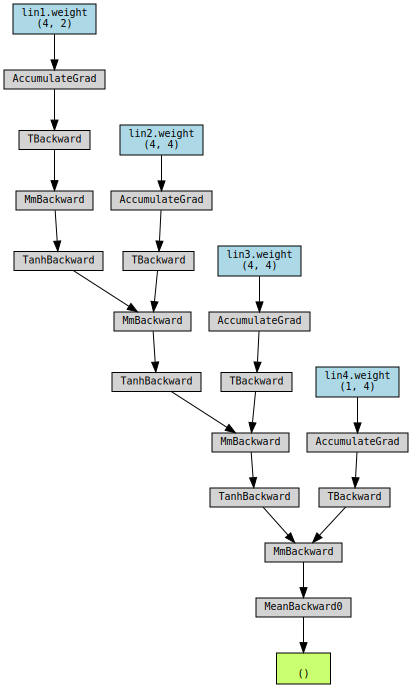

In [75]:
y = model(X)
make_dot(y.mean(), params=dict(model.named_parameters()))

In [76]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [77]:
loss_func = nn.L1Loss()

In [78]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [79]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = X[data_point].clone().detach().requires_grad_(False)
        y_var = Y[data_point].clone().detach().requires_grad_(False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0 or i == epochs-1:
        print(f"Epoch: {i}\tLoss: {loss.data.numpy():.10f}")

Epoch: 0	Loss: 1.0377969742
Epoch: 50	Loss: 0.4485968351
Epoch: 100	Loss: 0.0185726881
Epoch: 150	Loss: 0.0968158841
Epoch: 200	Loss: 0.0800212622
Epoch: 250	Loss: 0.0233694874
Epoch: 300	Loss: 0.1800021231
Epoch: 350	Loss: 0.3907821774
Epoch: 400	Loss: 0.1792690754
Epoch: 450	Loss: 0.0117145600
Epoch: 500	Loss: 0.0053608418
Epoch: 550	Loss: 0.2372881323
Epoch: 600	Loss: 0.0275977850
Epoch: 650	Loss: 0.0543813072
Epoch: 700	Loss: 0.4376320839
Epoch: 750	Loss: 0.2207777649
Epoch: 800	Loss: 0.0630731583
Epoch: 850	Loss: 0.0773190409
Epoch: 900	Loss: 0.0847213119
Epoch: 950	Loss: 0.0000000000
Epoch: 1000	Loss: 0.0000000000
Epoch: 1050	Loss: 0.0042299032
Epoch: 1100	Loss: 0.0845214128
Epoch: 1150	Loss: 0.0384672880
Epoch: 1200	Loss: 0.0000000000
Epoch: 1250	Loss: 0.0000000000
Epoch: 1300	Loss: 0.0000000000
Epoch: 1350	Loss: 0.0524245501
Epoch: 1400	Loss: 0.0910335779
Epoch: 1450	Loss: 0.0365871862
Epoch: 1500	Loss: 0.0000000000
Epoch: 1550	Loss: 0.0000000000
Epoch: 1600	Loss: 0.0556367636
